<a href="https://colab.research.google.com/github/Immaczx/Dash_whit_plotly/blob/main/Hello_World_of_Dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dash

Es un framework de código abierto para crear interfaces de visualización de datos, formalmente Dash fue lanzado como una biblioteca de código abierto para crear visualizaciones interactivas basadas en la Web y se construyó sobre Flask, Plotly.js y React Js,  este ha crecido para incluir implementaciones para R y Julia.

Pero no tiene que preocuparse por hacer que todas estas tecnologías funcionen juntas, dash permite crear paneles utilizando Python puro. Tener conocimientos de HTML y javascript es útil, pero ciertamente no es necesario para obtener una buena visualización, solo necesita escribir Python, R o Julia y espolvorearlo con un poco de CSS si desea una visualisacion mas profecional.

Este Notebook se hizo con la intencion de dar una guia clara para la facil comprencion de estructura, implementacion y posibilidad de la libreria Dash en la creacion de Dashboards. 

### Links usados para el tutorial

https://dash.plotly.com/layout

https://pbpython.com/plotly-dash-intro.html

https://realpython.com/python-dash/#what-is-dash

https://www.datacamp.com/community/tutorials/learn-build-dash-python

https://www.youtube.com/watch?v=FxEY1NOyhYQ

## Instalar Dash en collab

La linea "pip install jupyter-dash -q" permite instalar la vercion de Dash propia del compilador jupyter en colab

In [1]:
pip install jupyter-dash -q 

     |████████████████████████████████| 7.3 MB 6.3 MB/s 
     |████████████████████████████████| 23.9 MB 12 kB/s 
     |████████████████████████████████| 357 kB 63.9 MB/s 


## Html components

Para hablar de la creacion de visualisaciones en Dash hay que hablar un poco de como costruir con HTML, donde necesitaremos un layout, que contenga bloques(textos y graficas) que querramos incluir mediente el uso de etiquetas son similares a la forma que utilizamos para manipular contenido en latex.

Pero en lugar de escribir HTML o usar un motor de plantillas HTML, compondremos nuestro diseño usando estructuras de Python con la dash-html-components biblioteca.

### En el siguiente link se encuentran ejemplos ilustrativos la diferencia de contruccion con html y dash.

https://dash.plotly.com/dash-html-components

Se trajeron los ejemplos de "contruccion html con dash" y "Dash y Markdown" del link anterior a este notebook.

El comando html.Div permite crear secciones independientes dentro del layout.
Por otra parte, html.H1 se usa para los títulos, tiene variaciones como H2, H3, ..., H6 para hacer subtítulos. 
El siguiente componente es html.P se usa para escribir párrafos.
Este comando se presenta de dos formas la primera que es la más básica y la segunda la cual es más elaborada donde se usan las propiedades de este componente y dos componentes más.

la propiedad children. Por convención, siempre es el primer atributo, lo que significa que puede omitirlo: html.H1 (children = 'Hello Dash') es lo mismo que html.H1 ('Hello Dash'). este puede contener una cadena, un número, un solo componente o una lista de componentes.
Además, se usan html.Br() para el salto de página y html.A para incluir enlaces.
Por último, se hablara de la propiedad style, esta se agrega mediante un diccionario.

Dentro del link anterior al bajar se tiene un listado de los componentes html que se podrían usar en la creación de Dash. 

En la sección Dash y Markdown se muestra un cuadro de texto y como este mismo de agregaría mediante dcc.Markdown a un Dash.

### Construccion html con dash

In [2]:
import dash_html_components as html

html.Div([
    html.H1('Hello world of Dash'),
    html.Div([
        html.P('Dash convierte las clases de Python en HTML'),
        html.P(children=["Esta conversión se realiza entre bastidores mediante el front-end JavaScript de Dash",
                        html.Br(),
                        html.A("https://dash.plotly.com/dash-html-components",
                            href="https://dash.plotly.com/dash-html-components",),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),

    ])
])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  """Entry point for launching an IPython kernel.


Div([H1('Hello world of Dash'), Div([P('Dash convierte las clases de Python en HTML'), P(children=['Esta conversión se realiza entre bastidores mediante el front-end JavaScript de Dash', Br(None), A(children='https://dash.plotly.com/dash-html-components', href='https://dash.plotly.com/dash-html-components')], style={'textAlign': 'center', 'color': '#000000'})])])

### Dash y Markdown

Soportes Dash [Markdown](http://commonmark.org/help).

Markdown es una forma sencilla de escribir y formatear texto.
Incluye una sintaxis para cosas como **negrita** y *cursiva*,
[links](http://commonmark.org/help), fragmentos de `código` en línea, listas,
citas y mucho más.

In [3]:
import dash_core_components as dcc

dcc.Markdown('''
#### Dash and Markdown

Soportes Dash [Markdown](http://commonmark.org/help).

Markdown es una forma sencilla de escribir y formatear texto.
Incluye una sintaxis para cosas como **negrita** y *cursiva*,
[links](http://commonmark.org/help), fragmentos de `código` en línea, listas,
citas y mucho más.
''')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  """Entry point for launching an IPython kernel.


Markdown('\n#### Dash and Markdown\n\nSoportes Dash [Markdown](http://commonmark.org/help).\n\nMarkdown es una forma sencilla de escribir y formatear texto.\nIncluye una sintaxis para cosas como **negrita** y *cursiva*,\n[links](http://commonmark.org/help), fragmentos de `código` en línea, listas,\ncitas y mucho más.\n')

## Graficas

Los graficos seran el componentes de principal interes ya que un dashboard es una herramienta de gestión de la información que muestra de manera visual los indicadores clave de desempeño (KPI).

Asi que nesesitaremos formas vistosas y eficientes para mostrar estos (KPI), dash ofrece diferentes librerias para graficos
ademas de la opcion de los callbacks para graficas interactivas.

### En el siguiente link se encuentran ejemplos de las graficas

https://dash.plotly.com/dash-core-components/graph

### Ejemplos de graficos(chartjs) de html

En los siguientes links veremos ejemplos de chartjs en html dado que estos ejemplos son menos comunes en dash, sin embargo, esta sigue sido una opción aunque poco recomendada por el autor de este notebook a no ser que se tenga experiencia en html.

https://www.chartjs.org/docs/latest/charts/

https://developers.google.com/chart/interactive/docs/gallery/areachart

### Ejemplos de funciones usadas para graficar en Dash

En las siguientes celdas veremos la forma tradicional de mostrar gráficos en python, en las siguientes dos veremos cómo hacer esto mismo con las librerías más usadas en Dash. 

Las cuales son Graph Objects(https://plotly.com/python/graph-objects/) y Express (https://plotly.com/python/plotly-express/)

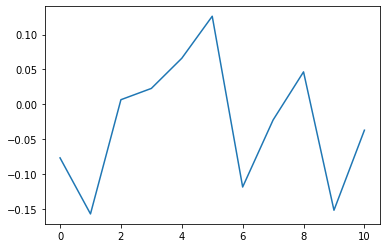

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,11)

mu, sigma = 0, 0.1 # media y desviacion estandar
y = np.random.normal(mu, sigma, 11)

plt.plot(x,y)

In [5]:
# Express

import plotly.express as px

fig = px.line(x=x, y=y)
fig.show()

In [6]:
# Graph Objects

import plotly.graph_objects as go

fig = go.Figure() 

fig.add_trace(go.Line(x=x, y=y))

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# ¿Ventajas de las los paquetes graph_objects y express?
Estos paquetes muestran su verdadera utilidad al tratar con Datasets.
Acontunuacion veremos un ejemplo de trabajo con estos paquetes donde de una Dataset se mostraran un grafico de barrar agrupado por marca y separado por vendedor permitiendo observar rapida y facilmente la informacion del dataset como la comparativa de ventas de cada empleado por marca.

Estos paquetes de graficas nos permiten hacer graficas interactivabas mediante Callbakcs, al final de este notebook veremos unas comparativas entre unas graficas y su contraparte interactiva.

In [7]:
import pandas as pd

df = pd.DataFrame({
  "Cell phone brand": ["Apple", "Xiaomi", "Samsung", "Apple", "Xiaomi", "Samsung"],
  "Sellers": ["SellerA", "SellerA", "SellerA", "SellerB", "SellerB", "SellerB"],
  "Number sales": [1, 2, 3, 3, 1, 2],
})


# Express

fig = px.bar(df, x="Cell phone brand", y="Number sales", color="Sellers", barmode="group")
fig.show()


# Graph Objects

fig = go.Figure()
for Sellers, group in df.groupby("Sellers"):
    fig.add_trace(go.Bar(x=group["Cell phone brand"], y=group["Number sales"], name=Sellers,
      hovertemplate="Sellers=%s<br>Cell phone brand=%%{x}<br>Number sales=%%{y}<extra></extra>"% Sellers))
fig.update_layout(legend_title_text = "Sellers")
fig.update_xaxes(title_text="Cell phone brand")
fig.update_yaxes(title_text="Number sales")
fig.show()

# Instalar componetes para ver el Dash de forma remota en colab



La linea "pip install pyngrok" permite intalar una api de ngrok en python. ngrok es una herramienta de proxy inverso que abre túneles seguros desde URL públicas a localhost, perfecta para exponer servidores web locales, crear integraciones de webhook, habilitar el acceso SSH, probar chatbots, hacer demostraciones desde su propia máquina y más, y se hace aún más poderoso con integración nativa de Python a través de pyngrok. https://pypi.org/project/pyngrok/

In [8]:
! pip install pyngrok

     |████████████████████████████████| 745 kB 5.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=ad020fcf6a2c717a4ce251e389d21f2a527de84e0100d28ff358cead456dba1d
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


# Configurar Nkrok

Se descarga una vercion estable de ngrok para la el sistema linux usado en colab.

In [9]:
#download ngrok first
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -q
!unzip -q ngrok-stable-linux-amd64.zip

Creacion del tunel http al local host.


In [10]:
import requests
get_ipython().system_raw("./ngrok http 8050 &")
# check public url
import time

time.sleep(3)
r = requests.get("http://localhost:4040/api/tunnels")
url = r.json()["tunnels"][0]["public_url"]
url

'https://dc11-34-75-154-33.ngrok.io'

# Mostrar en dash

Para la creacion de este Dash board se usaron los elemtos mencionados anteriormente, adiciaonando en las secciones html el comando Children, el html.br y style. como se menciono anteriormente este dash contiene en su final dos ejemplos de graficas con sus contrapartes interactivas.

In [14]:
from jupyter_dash import JupyterDash  # pip install dash
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import plotly.express as px
import plotly.graph_objects as go
from dash import no_update
import pandas as pd  # pip install pandas

external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

df = px.data.iris()  # Dase de datos iris optenida de plotly.espress

app = JupyterDash(
    __name__, external_stylesheets=external_stylesheets
)  # Crear objeto JupyterDash Para visualisacion en el entorno
# Crear un layout para contener el texto y graficas.
# Crea Div para separar secciones, no tiene ningún efecto sobre el contenido o el diseño hasta que se le aplica estilo usando CSS.
app.layout = html.Div(
    children=[
        html.H1(
            children="Hello Word of Dash",
            style={
                "textAlign": "center",
                "color": "#0D6080",
            },  # La funcion style nos permite personalizar la estetica del documento
        ),  # Crecion del titulo(Encabezado)
        html.P(
            children=[
                """
                            la idea es que al leer este dash y posteriormente ver el codigo comentado puedan indentificar rapidamente
                            las parte que lo componen y su funcionalidad.
                            Por ejemplo este es un parrafo y el tirulo anterior estan contruidos con html_components.

                """
            ],
            style={"textAlign": "center", "color": "#004D38"},
        ),  # Creacion Parrafo
        dcc.Markdown(
            children=[
                """
                             Este dashboard muestra unos ejemplos de graficas sobre la base de datos iris. la cual cuanta con los datos de la variacion morfologica de tres especies distintas de la flor iris. 
                             Este parrafo esta construido con la herramienta dash-Markdown.

                            """
            ],
            style={"textAlign": "center", "color": "#000000"},
        ),  # Implemetacion de texto con Markdown
        html.Div(
            [
                html.H2(
                    children="Graficas con funciones(plotly.graph_objects)",  # Crear subtitulo(los encabezados reduciran su tamaño al aumentar el numero al lado del H)
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La funcion style nos permite personalizar la estetica del documento
                ),  # Crecion del titulo(Encabezado)
                html.P(
                    children=[
                        "Ejemplos Graficas:.",
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/graph-objects/",
                            href="https://plotly.com/python/graph-objects/",
                        ),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),  # Creacion Parrafo
                dcc.Graph(  # Seccion Grafica
                    id="example-graph",  # id Grafica
                    figure=go.Figure(data=[  # Grafica barras tipo Go
                          go.Bar(x=df.index, y=df.sepal_width, name='sepal_width'), 
                          go.Bar(x=df.index, y=df.sepal_length, name='sepal_length')], 
                          layout=go.Layout(title="Bar diagram with go")),
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-boxplot",  # id Grafica
                    figure=go.Figure(data=[  # Grafica barras tipo Go
                          go.Box(y=df.sepal_width, name='sepal_width'), 
                          go.Box(y=df.sepal_length, name='sepal_length')], 
                          layout=go.Layout(title="Boxplot with go")),
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-histogram",  # id Grafica
                    figure=go.Figure(data=[  # Grafica barras tipo Go
                          go.Histogram(x=df.sepal_width)], 
                          layout=go.Layout(title="Histogram with go")),
                ),
                html.H2(
                    children="Graficas con funciones(plotly.express)",
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La funcion style nos permite personalizar la estetica del documento
                ),  # Crecion del titulo(Encabezado)
                html.P(
                    children=[
                        "Ejemplos Graficas:.",
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/plotly-express/",
                            href="https://plotly.com/python/plotly-express/",
                        ),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),  # Creacion Parrafo
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.bar(
                        df,
                        x=df.index,
                        y="sepal_width",
                        color=df.species,
                        title="Bar diagram with px",
                    ),  # Grafica Barras con Funciones
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-boxplot-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.box(
                        df, y="sepal_width", color=df.species, title="Boxplot with px"
                    ),  # Boxplot con Funciones
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-histogram-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.histogram(
                        df, x="sepal_length", y="sepal_width", title="Histogram with px"
                    ),  # Histograma con Funciones
                ),
            ],
            style={"columnCount": 2},
        ),  # Estilo 2 columnas
        html.Div(
            [
                html.H2(
                    children="Graficas mas elaboradas",
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La funcion style nos permite personalizar la estetica del documento
                ),  # Crecion del titulo(Encabezado)
                html.P(
                    children=[
                        "La ventaja de usar funciones es que se pueden crear graficas mas complejas con poco codigo como las siguientes",
                        html.Br(),
                        "en las cuales vemos gran cantidad de datos y estas permiten una implemtacion facil y rapida de los Callback.",
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/",
                            href="https://plotly.com/python/",
                        ),
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/statistical-charts/",
                            href="https://plotly.com/python/statistical-charts/",
                        ),
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/ai-ml/",
                            href="https://plotly.com/python/ai-ml/",
                        ),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),  # Creacion Parrafo
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-multyscatter-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.scatter_matrix(
                        df,
                        dimensions=[
                            "sepal_width",
                            "sepal_length",
                            "petal_width",
                            "petal_length",
                        ],
                        color="species",
                        title="scatteplot with px",
                    ),  # Grafica matriz scater plot
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-histmarginal-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.histogram(
                        df,
                        x="sepal_length",
                        y="sepal_width",
                        color="species",
                        marginal="box",
                        title="Scatterplot with marginal graf x, y in px",
                    ),  # Historagama con grafica marginal boxplot
                ),
                html.H3(
                    children="Graficas interactivas(Callback)",
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La funcion style nos permite personalizar la estetica del documento
                ),  # Crecion del titulo(Encabezado)
                dcc.Dropdown(
                    id="dropdown",  # id Multi-Select Dropdown
                    options=[{"label": x, "value": x} for x in ["sepal_width", "sepal_length", "petal_width", "petal_length"]],
                    value=["sepal_width", "sepal_length"],
                    multi=True,
                ),
                dcc.Graph(id="splom"),  # id Grafica
                dcc.Graph(id="graph"),  # id Grafica
                html.P("Select Distribution:"),
                dcc.RadioItems(
                    id="dist-marginal",  # id Checkboxes
                    options=[
                        {"label": x, "value": x} for x in ["box", "rug", "violin"]
                    ],
                    value="box",
                ),
            ],
            style={"columnCount": 2},
        ),  # Estilo 2 columnas
    ]
)

@app.callback(Output("splom", "figure"), [Input("dropdown", "value")])  # id Grafica
def update_bar_chart(dims):
    fig = px.scatter_matrix(df, dimensions=dims, color="species")
    return fig

@app.callback(
    Output("graph", "figure"), [Input("dist-marginal", "value")]  # id Grafica
)
def display_graph(marginal):
    fig = px.histogram(
        df,
        x="sepal_length",
        y="sepal_width",
        color="species",
        marginal=marginal,
        hover_data=df.columns,
    )
    return fig

app.run_server(mode="inline", port=8050)

# 636EFB violeta graf 
# EF553B naranja graf
# 00CD95 verde graf
# 004D38 Verde cool


<IPython.core.display.Javascript object>

Ir a este link para ver página

In [12]:
url

'https://dc11-34-75-154-33.ngrok.io'